# Predicción de la deserción
Contamos con un dataset el cual posee una lista de clientes con una gran variedad de parámetros para analizar. Entre los cuales están los salarios, la cantidad de compras realizadas, la permanencia en el sitio, el sexo, etc.

Nuestro objetivo final es estimar qué clientes son más propensos a desertar del sitio con el fin de poder tomar medidas de retencián sobre ellos. 


Equipo:
> - Roberth Hernandez
> - Rodrigo Gomez Portillo

## Dataset

Link al dataset: https://www.kaggle.com/code/hieunt01/churn-predictions-using-logistic-regression

## Análisis entregado

En esta ocasión se realizó un análisis de las variables contenidas en el dataset para poder identificar patrones y dependencias entre las mismas.


# Importaciones

In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import os
import matplotlib.pyplot as plt
mpl.style.use('bmh')

In [10]:
#LECTURA DE LA DATA
df = pd.read_csv("Data\Churn Prediction.csv",delimiter = ";",index_col=0)
df.drop('Surname', inplace = True, axis = 1)
df.drop('Id', inplace = True, axis = 1)
df['score_by_products'] = df['Score'] / df['Products']


Se eliminaron las variables Surname y Id ya que no hay razón para analizarlas.

También se creó una varible nueva que nace de la division entre el score del cliente y la cantidad de productos comprados.

In [12]:
#CONSTRUCCION DEL DATAFRAME
data = pd.DataFrame(df)
data.head()

,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited,score_by_products
Row,,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1,619.000000
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,608.000000
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,167.333333
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0,349.500000
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,850.000000


In [13]:
#VEMOS LA INFORMACION DEL DATASET
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Score              10000 non-null  int64  
 1   Nationality        10000 non-null  object 
 2   Gender             10000 non-null  object 
 3   Age                10000 non-null  int64  
 4   Tenure             10000 non-null  int64  
 5   Balance            10000 non-null  float64
 6   Products           10000 non-null  int64  
 7   Card               10000 non-null  int64  
 8   Active             10000 non-null  int64  
 9   Salary             10000 non-null  float64
 10  Exited             10000 non-null  int64  
 11  score_by_products  10000 non-null  float64
dtypes: float64(3), int64(7), object(2)
memory usage: 1015.6+ KB


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Score,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
Products,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
Card,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
Active,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
Salary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00
score_by_products,10000.0,486.417308,183.636877,94.00,323.00,443.000,653.0000,850.00


In [15]:
#VEMOS LAS COLUMNAS QUE FORMAN PARTE DEL DATAFRAME
data.columns

Index(['Score', 'Nationality', 'Gender', 'Age', 'Tenure', 'Balance',
       'Products', 'Card', 'Active', 'Salary', 'Exited', 'score_by_products'],
      dtype='object')

# Analisis univariado

En el análisis univariado pudimos concluir que: 
- Los clientes franceses representan más del 50% del dataset.
- No hay una diferencia impotante entre la cantidad de mujeres y hombres
- Donde score ~ 600 parece que hay más compras de productos
- El 50% de los usuarios se encuentran entre los 32 y 44 años


France     5014
Germany    2509
Spain      2477
Name: Nationality, dtype: int64

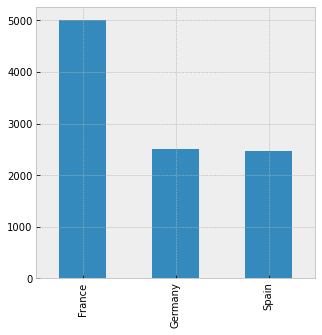

In [16]:
#CREAMOS UN GRAFICO DE BARRAS PARA LA VARIABLE NACIONALIDAD Y GENERO A CONTINUACION
plt.rcParams['figure.figsize'] = (5, 5)

data['Nationality'].value_counts().plot.bar();
data['Nationality'].value_counts()

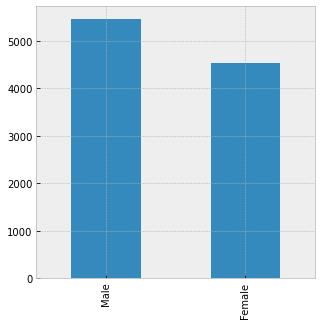

In [17]:
data['Gender'].value_counts().plot.bar();

<AxesSubplot:xlabel='Age'>

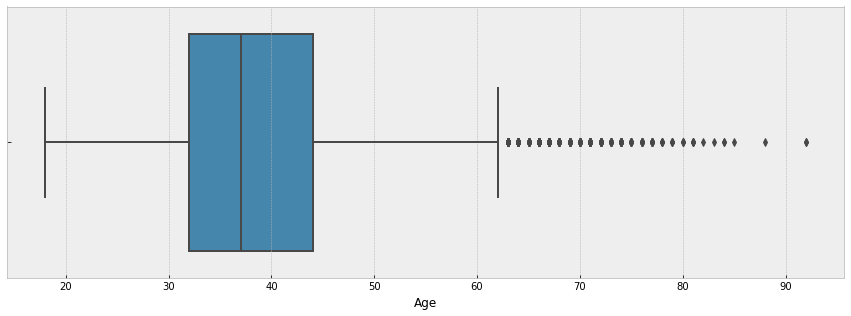

In [18]:
#SE CREA UN GRAFICO DE LINEAS DE LA VARIABLE EDAD
plt.rcParams['figure.figsize'] = (15, 5)
sns.boxplot(x='Age', data=data)

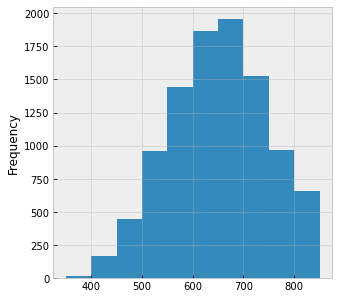

In [19]:
#SE CREA UN HISTOGRAMA PARA LA VARIABLE SCORE
plt.rcParams['figure.figsize'] = (5, 5)
data['Score'].plot.hist();

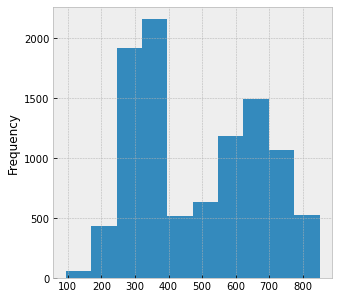

In [20]:
#SE CREA UN HISTOGRAMA PARA LA VARIABLE SCORE
data['score_by_products'].plot.hist();

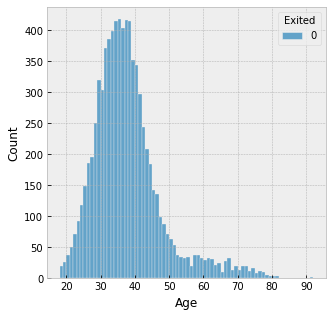

In [21]:
plt.rcParams['figure.figsize'] = (5, 5)
sns.histplot(data=data.loc[data['Exited'] == 0], x="Age", hue="Exited", multiple="stack");

# Analisis Multivariado

In [22]:
corr = data.drop(labels = ['Products','Card','Active','Tenure'] ,axis = 1).corr()
corr

,Score,Age,Balance,Salary,Exited,score_by_products
Score,1.000000,-0.003965,0.006268,-0.001384,-0.027094,0.382499
Age,-0.003965,1.000000,0.028308,-0.007201,0.285323,0.053674
Balance,0.006268,0.028308,1.000000,0.012797,0.118533,0.320602
Salary,-0.001384,-0.007201,0.012797,1.000000,0.012097,-0.012126
Exited,-0.027094,0.285323,0.118533,0.012097,1.000000,0.118944
score_by_products,0.382499,0.053674,0.320602,-0.012126,0.118944,1.000000


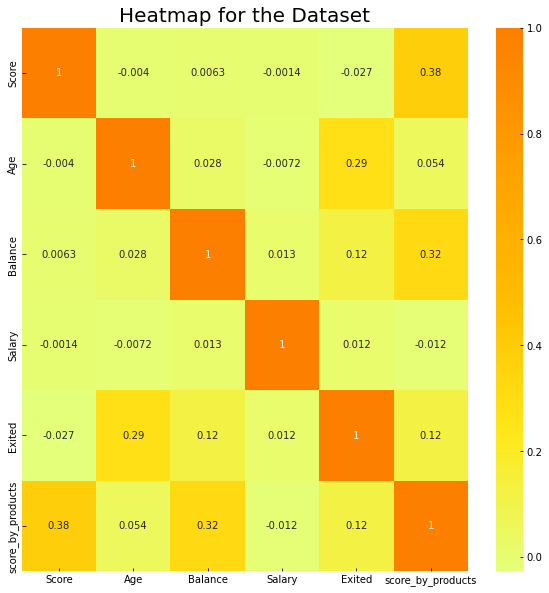

In [23]:
plt.rcParams['figure.figsize'] = (10, 10)

sns.heatmap(corr, annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()
# A partir de este grafico puedo deducir que la correlacion mas fuerte que existe
# esta entre 'Age' y 'Exited'

En la matriz de correlación se oberva que Age y Salary tienen correlacion negativa, por lo que a medida que la edad aumenta el salario disminuye. Sin embargo, la correlación entre ambas es bastante baja lo que no permite ser conluyente al respecto de dicha relación


## Grafica de relaciones entre variables

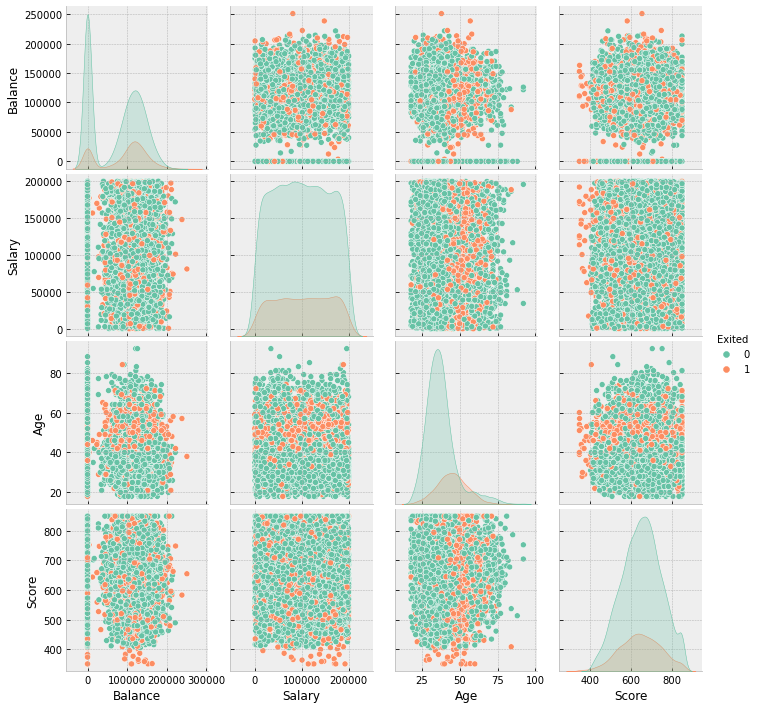

In [24]:
#Pairplot
sns.pairplot(data,hue = 'Exited'  , palette = 'Set2', vars = ['Balance', 'Salary','Age','Score']);

## Age

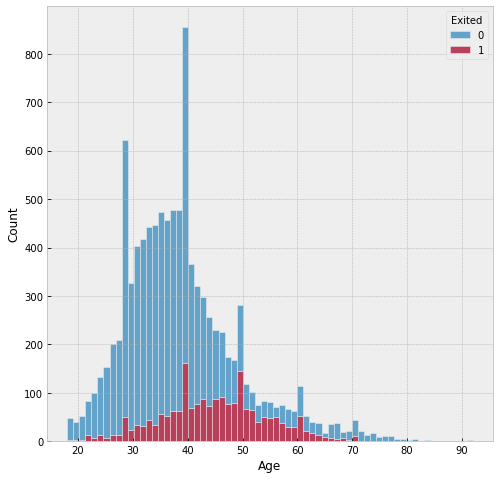

In [25]:
plt.rcParams['figure.figsize'] = (8, 8)
sns.histplot(data=data, x="Age", hue="Exited", multiple="stack");

<AxesSubplot:xlabel='Exited', ylabel='Age'>

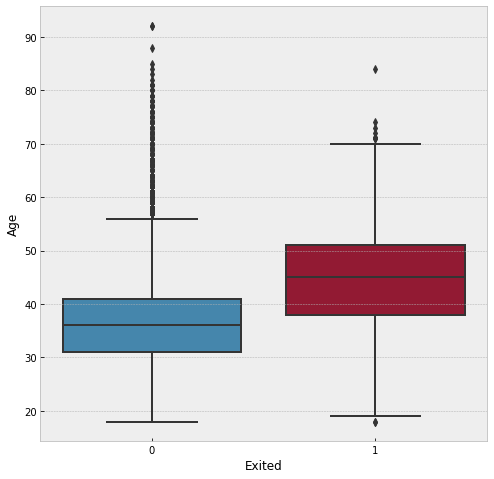

In [26]:
plt.rcParams['figure.figsize'] = (8, 8)
sns.boxplot(x = 'Exited',y ='Age', data = data)

<AxesSubplot:xlabel='Nationality', ylabel='Age'>

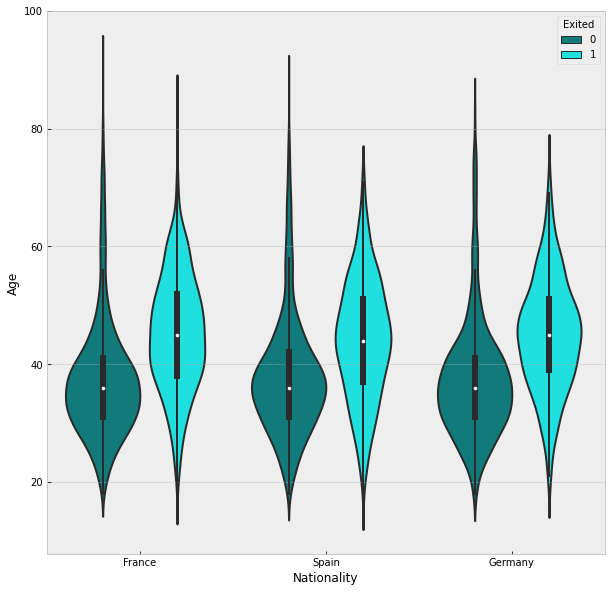

In [27]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.violinplot(x='Nationality',y="Age", hue = 'Exited',data=data,palette=['#008B8B','#00FFFF'])

- Tanto lo que se muestra en el pairplot y en los últumos dos gráficos muestran que la mayor desercion se incrementa para aquellas personas con mas de 40 años.
- Se observa que en todos los paises el comportamiento es el mismo
- Parece que luego de los 50 años de edad la cantidad de personas que no desertan se mantiene, aunque hay que tener en cuanta que luego de los 60 años se consideran outliears.


## Salario y Balance

<AxesSubplot:xlabel='Nationality', ylabel='Salary'>

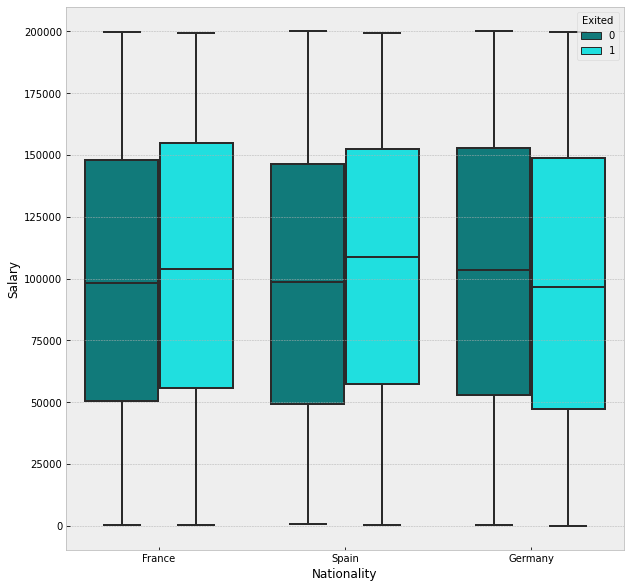

In [28]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.boxplot(x='Nationality',y="Salary", hue = 'Exited',data=data,palette=['#008B8B','#00FFFF'])

<AxesSubplot:xlabel='Nationality', ylabel='Balance'>

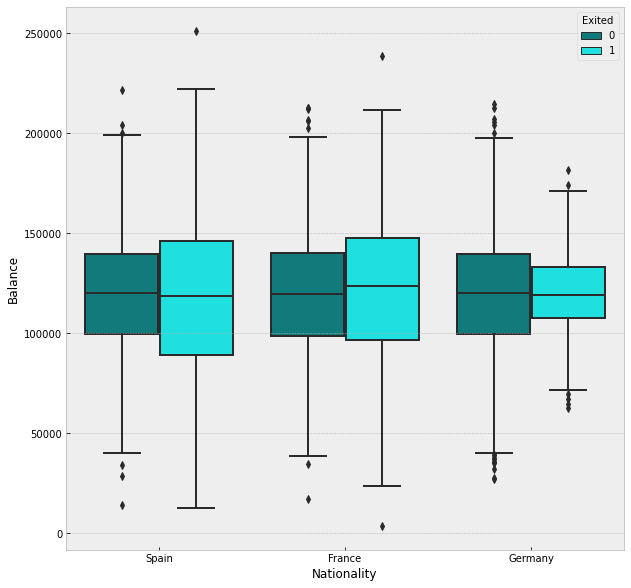

In [29]:
## Se grafica sin los ceros en el balance, ya que en Alemania no hay balances en cero y sesga el análisis
plt.rcParams['figure.figsize'] = (10, 10)
sns.boxplot(x='Nationality',y="Balance", hue = 'Exited',data=data.loc[data['Balance'] != 0],palette=['#008B8B','#00FFFF'])

- No se puede concluir relación entre los balances y salarios y las nacionalidades.

## Score

<AxesSubplot:xlabel='Exited', ylabel='Score'>

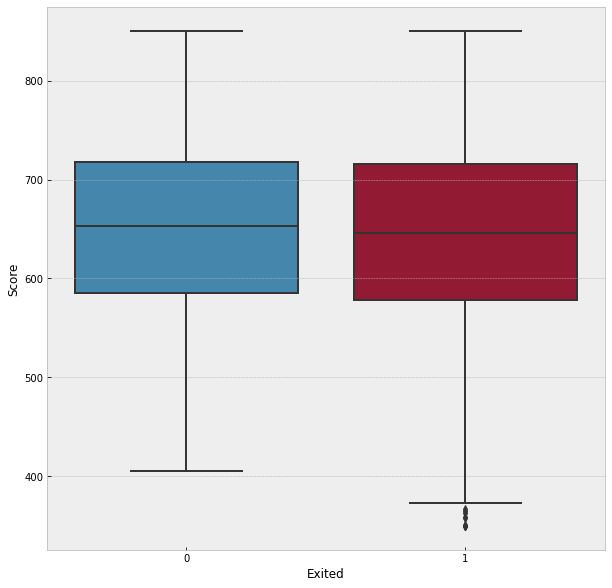

In [30]:
sns.boxplot(x = 'Exited',y ='Score', data = data)

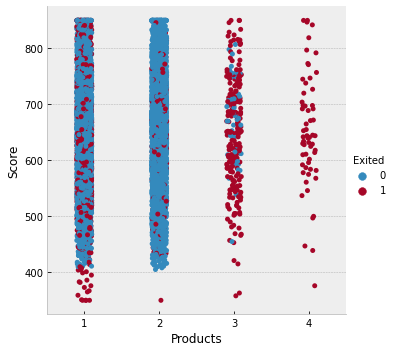

In [31]:
sns.catplot(x="Products", y="Score", data=data, hue = 'Exited')

<AxesSubplot:xlabel='Nationality', ylabel='score_by_products'>

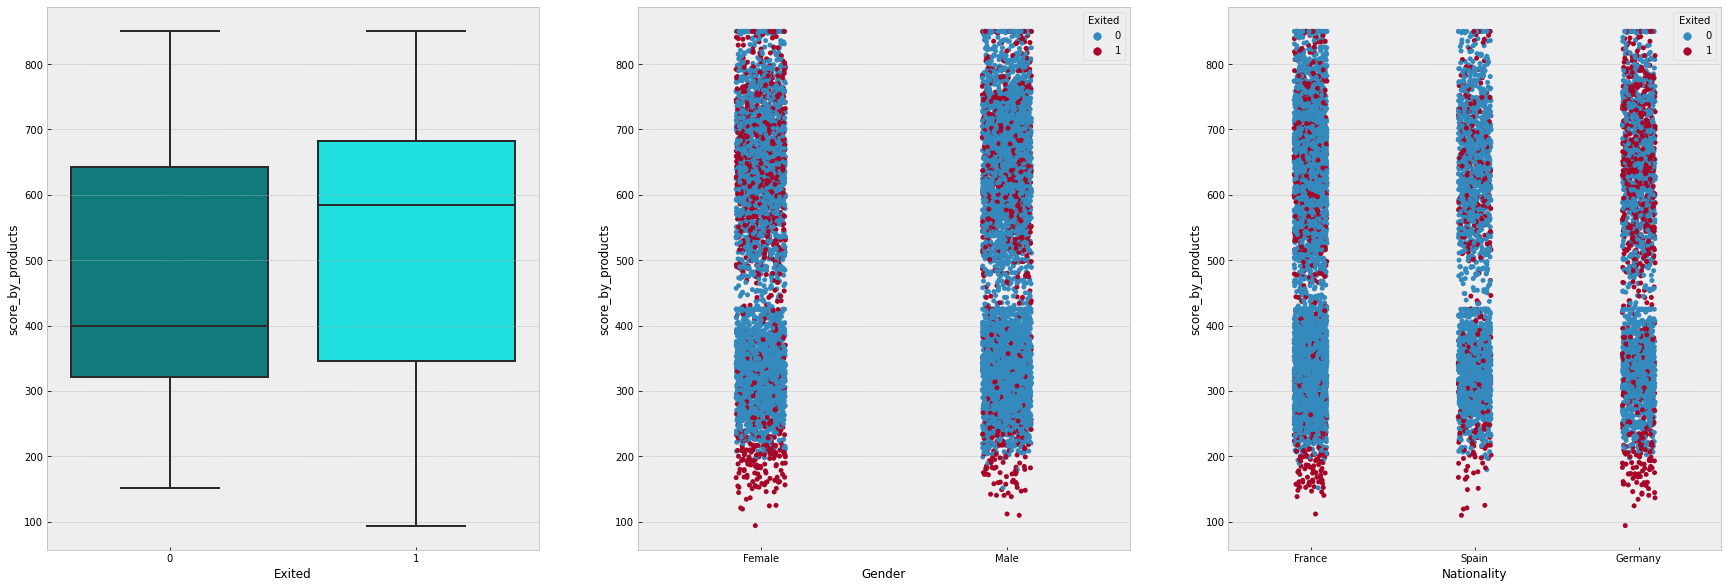

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

sns.boxplot(ax=axes[0], y="score_by_products", x = 'Exited',data=data,palette=['#008B8B','#00FFFF'])
sns.stripplot(ax=axes[1], x="Gender", y="score_by_products", data=data, hue = 'Exited')
sns.stripplot(ax=axes[2], x="Nationality", y="score_by_products", data=data, hue = 'Exited')


- Aquí observamos que efectivamente no hay relacion entre el score y exited
- Se observa que mientras mas productos fueron comprados mayor score se alcanzó
- Se observa que nadie que haya comprado 4 productos ha permanecido sin desertar
- Cuando se evalua el score por cantidad de productos comprados se ve que hay una franja entre los 250 y los 400 que tiene menos densidad de usuarios desertados


## Gender

<AxesSubplot:xlabel='Gender', ylabel='Age'>

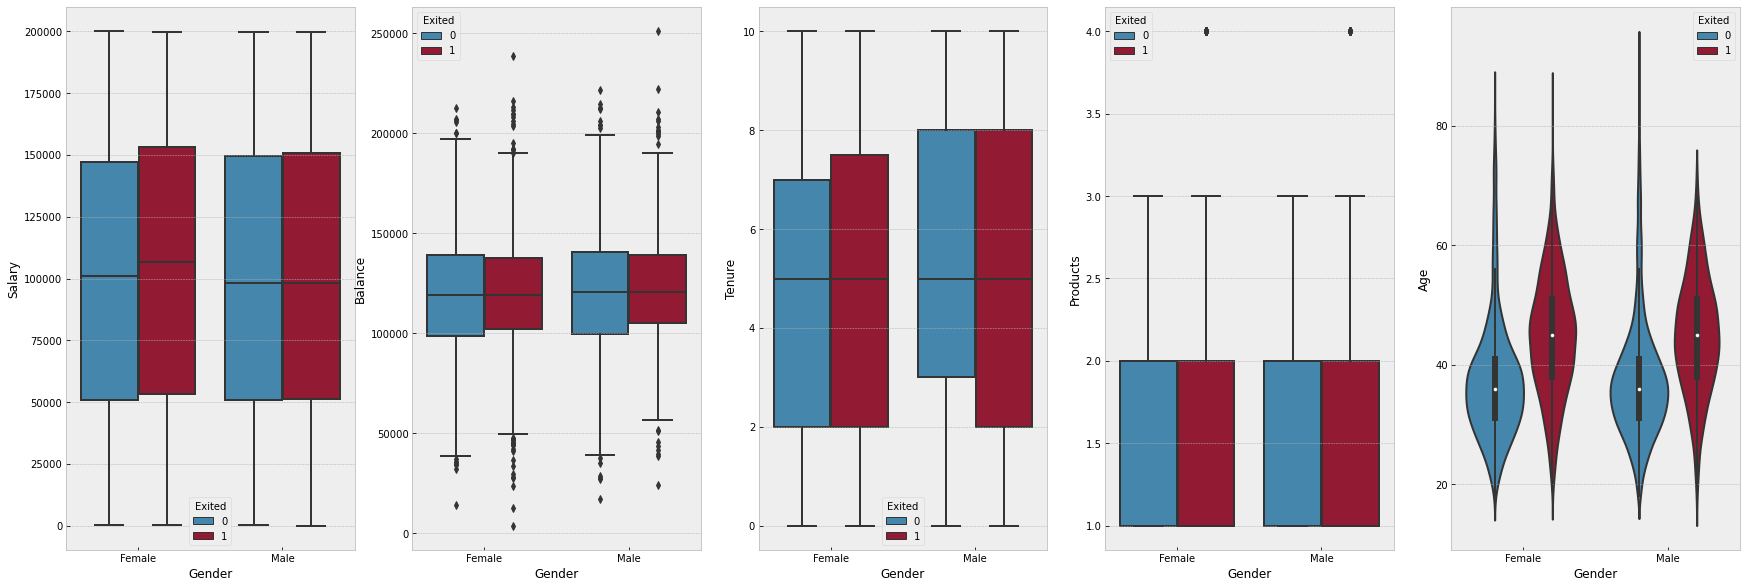

In [33]:
fig, axes = plt.subplots(1, 5, figsize=(30, 10))

sns.boxplot(ax=axes[0], data=data, y='Salary', x='Gender', hue = 'Exited')
sns.boxplot(ax=axes[1], data=data.loc[data['Balance'] != 0], y='Balance', x='Gender', hue = 'Exited')
sns.boxplot(ax=axes[2], data=data, y='Tenure', x='Gender', hue = 'Exited')
sns.boxplot(ax=axes[3], data=data, y='Products', x='Gender', hue = 'Exited')
sns.violinplot(ax=axes[4], data=data, y='Age', x='Gender', hue = 'Exited')


- A simple vista el genero es una variable categórica que no representa diferencias cuando se las compara con las otras varibales. Donde más diferencia se puede encontrar es con la variable Tenure

# Análisis multivariado por agrupaciones


In [34]:
#AQUI OBSERVAMOS QUE EFECTIVAMENTE EXISTEN DIFERENCIAS CUANDO HACEMOS
#EL ANALISIS CON NUESTRA VARIABLE TARGET
multi = data.groupby(['Active','Exited']).median()[['Age','Score']]
print(multi)


                Age  Score
Active Exited             
0      0       35.0  650.0
       1       45.0  648.0
1      0       37.0  656.0
       1       45.0  644.0


- Llegando a la conclusion que no dependera mucho si esta activo, pero si hay diferencias de edad cuando se mantiene o se retira. en este caso, el analisis se hizo con la mediana y no con el promedio porque con promedio obteniamos valores decimales para la edad y no corresponde 

                           Salary       Score
Exited Nationality                           
0      France        99217.097331  651.162226
       Germany      102414.657876  653.261357
       Spain         98602.369864  652.104167
1      France       103439.278296  641.914815
       Germany       98403.886450  647.689189
       Spain        103629.554818  647.484262


<AxesSubplot:xlabel='Exited,Nationality'>

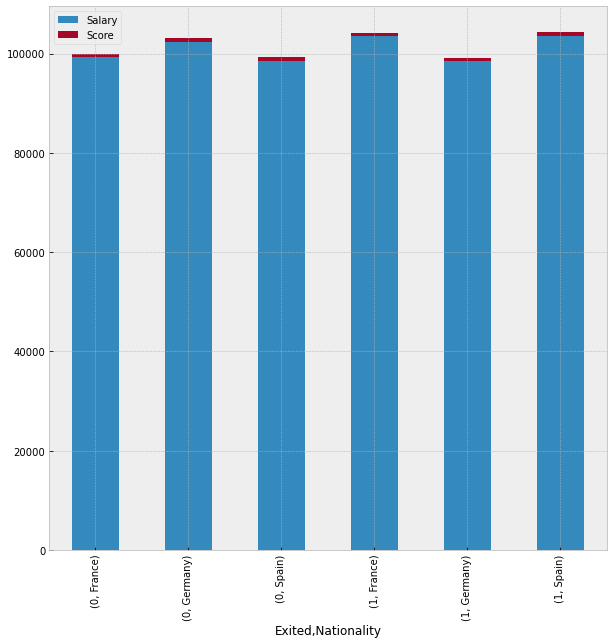

In [35]:
#ANALIZAMOS LA SIGUIENTE COMBINACION
multi = data.groupby(['Exited','Nationality']).mean()[['Salary','Score']]
print(multi)
multi.plot.bar(stacked=True)
 

- Las personas de alemania abandonan en promedio cuando cuentan con menor salario mientras que francia y espania sube su salario y ahi se produce el abandono, del score no hay mucho por decir



In [36]:
#ANALIZAMOS LA SIGUIENTE COMBINACION
multi = data.groupby(['Exited','Gender']).mean()[['Salary','Balance']]
multi


Salary       Balance
Exited Gender                             
0      Female   99816.071486  71183.249639
       Male     99680.391827  73911.607037
1      Female  102948.986093  89036.639359
       Male     99584.287272  93736.483742

- El género femenino con mejor salario y mejora cuando exited vale 
- El género masculino parece mantener su salario independiente del abandono.
- En cuanto al balance se observa que el genero masculino se mantiene por encima del femenino


<br/>
A continuación se analiza la mediana para obtener mas conclusiones:

                   Salary     Balance
Exited Gender                        
0      Female  101026.530   89967.165
       Male     98060.510   93911.300
1      Female  106663.460  108076.330
       Male     98083.205  111310.710


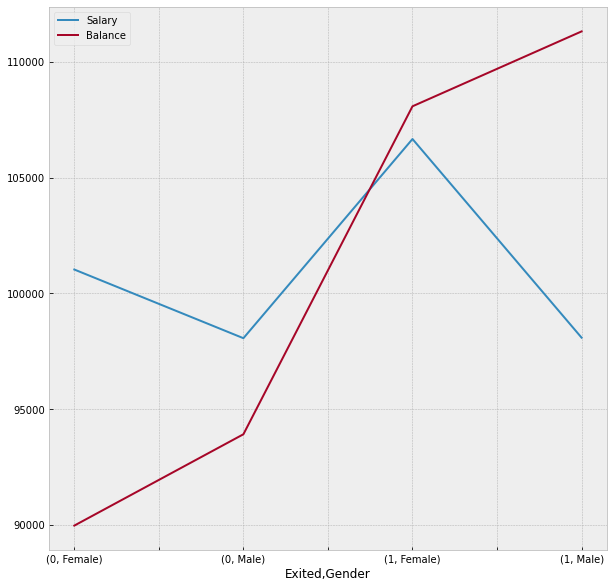

In [37]:
multi = data.groupby(['Exited','Gender']).median()[['Salary','Balance']]
print(multi)
multi.plot.line();

- Se observa que cuando exited es 0, las mujeres tienen mayor salario pero menor balance y en los hombres ocurre lo contrario es decir mayor balance pero menor salario. Cuando exited vale 1 las mujeres tienen un balance parecido a su salario y los hombres disminuyen su salario pero aumentan su balance.

# Conclusiones

Los cálculos de correlación muestran dependencias entre algunas varibles, pero no parecen dependencias razonables.
<br/><br/>

La variable Age es la que más peso parece tener a la hora de estimar una deserción. Por otro lado la cantidad de productos y el score_by_product tambien parecen ser varibles potenciales para realizar la predicción de deserción 